In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime_data=pd.read_csv("\\Users\\piyus\\Downloads\\crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data.shape

(50, 5)

In [4]:
data=crime_data.copy()
data=data.iloc[:,1:]
data.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [5]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
data.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [7]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(data.iloc[:,0:])
data.iloc[:,0:]=scale.transform(data.iloc[:,0:])

data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [8]:
# elbow method to get best k in kmeans
k_rng=range(1,10)
sse= []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
sse

[13.184122550256447,
 6.596893867946197,
 5.016388924690672,
 3.683456153585914,
 3.231186030431302,
 2.8270327690495822,
 2.637109006272265,
 2.3973324749066562,
 2.1788367596274574]

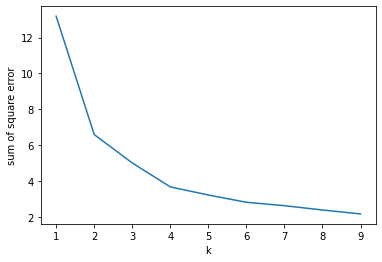

In [10]:
from matplotlib import pyplot as plt
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

# KMeans clustering

In [11]:
model=KMeans(n_clusters=4)
y_pred=model.fit_predict(data)
y_pred

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [12]:
data['Cluster']=y_pred
data.head()

,Murder,Assault,UrbanPop,Rape,Cluster
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,0


In [13]:
crime_data.groupby(data.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


In [14]:
data_df=data.drop('Cluster',axis=1)

# DBSCAN

In [15]:
model_=DBSCAN(eps=0.3,min_samples=5)
y_predict=model_.fit_predict(data_df)

y_predict


array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [16]:
data_df['clust']=y_predict
data_df.head()

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,-1


In [17]:
crime_data.groupby(data_df.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
-1,10.992857,271.500000,71.357143,30.485714
0,14.720000,232.600000,58.200000,23.720000
1,5.222581,115.290323,64.096774,16.651613


# Hierarchical clustering 

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

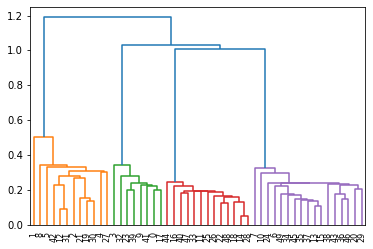

In [19]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(data,method='single'))

In [20]:
HC=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
y_hc=HC.fit_predict(data)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,2
1,0
2,0
3,2
4,0
5,0
6,1
7,1
8,0
9,2
